In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ścieżka do pliku z danymi
DATA_FILE = "artifacts/data/all_train.csv"

pd.set_option('display.max_colwidth', None)

# Analiza Eksploracyjna Danych Sentymentu

Ten notebook służy do analizy i wizualizacji zbioru danych dotyczącego sentymentu w branży finansowej.

In [4]:
df = pd.read_csv(DATA_FILE)
print(f"Wczytano {len(df)} wierszy.")
df.head()

Wczytano 5842 wierszy.


,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [6]:
df.describe(include='object')

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,"Managing Director 's comments : `` Net sales for the first quarter were notably lower than a year before , especially in Finland , Russia and the Baltic countries .",neutral
freq,2,3130


## Dystrybucja Sentymentu

In [7]:
sentiment_counts = df['Sentiment'].value_counts()
print("Liczba wystąpień dla każdej klasy sentymentu:")
print(sentiment_counts)

Liczba wystąpień dla każdej klasy sentymentu:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


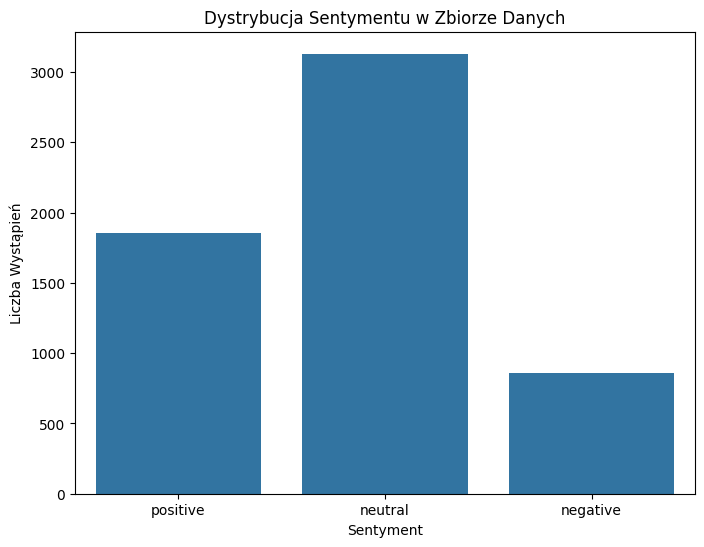

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Dystrybucja Sentymentu w Zbiorze Danych')
plt.xlabel('Sentyment')
plt.ylabel('Liczba Wystąpień')
plt.show()

## Przykłady Zdań

In [9]:
for sentiment in ['positive', 'neutral', 'negative']:
    print(f"--- Przykłady dla sentymentu: {sentiment.upper()} ---")
    sample = df[df['Sentiment'] == sentiment].sample(3, random_state=42)
    for index, row in sample.iterrows():
        print(f"- {row['Sentence']}")


--- Przykłady dla sentymentu: POSITIVE ---
- Sales VAT inclusive expanded by 19 percent , to 351 million euros .
- $FB Big Money Is Pouring Into Facebook From All Directions;http://stks.co/sOwG
- According to CEO Matti Karppinen , Frozen Foods posted a good result in 2010 , as it did in 2009 .
--- Przykłady dla sentymentu: NEUTRAL ---
- The fixed acquisition price amounts to NOK 70 ( approximately EUR 8.7 ) million and additional price NOK 15 ( EUR 1.8 ) million at maximum .
- The Finnish company previously said its operating result will be lower than the break-even posted a year earlier .
- Westpac Banking Corp - Is to issue a benchmark , 3 year FRN deal in Euros .
--- Przykłady dla sentymentu: NEGATIVE ---
- `` Adjustment to the fall in price level , in contrast , has been less effective .
- Hard to find new buyers of $TSLA at 250.  Shorts continue to pile in.
- Finnlines estimated in its annual general meeting that 2008 will be financially a tough year due to large investments .


## Analiza Długości Zdań

In [10]:
df['Sentence_Length'] = df['Sentence'].str.len()
df[['Sentiment', 'Sentence_Length']].describe()

,Sentence_Length
count,5842.000000
mean,117.022253
std,56.420425
min,9.000000
25%,72.000000
50%,107.000000
75%,150.000000
max,315.000000


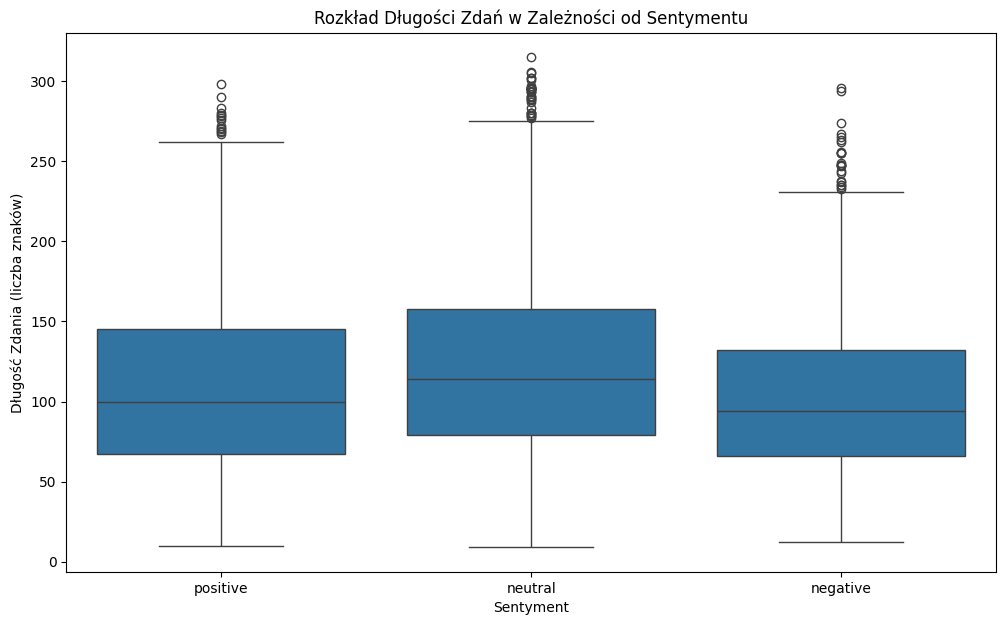

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sentiment', y='Sentence_Length', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Rozkład Długości Zdań w Zależności od Sentymentu')
plt.xlabel('Sentyment')
plt.ylabel('Długość Zdania (liczba znaków)')
plt.show()